In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/drive/MyDrive/KE TUJUH GUYS/PY for Data Science/Final Project/Hujan.csv')

df = pd.DataFrame(data)

df

,tahun,bulan,curah hujan,tekanan udara,kecepatan angin,suhu,hari hujan
0,2002,1,219.0,920.6,5.0,22.7,27.0
1,2002,2,563.8,922.8,6.0,22.9,22.0
2,2002,3,344.1,921.8,4.0,23.5,25.0
3,2002,4,183.1,921.4,4.0,23.7,20.0
4,2002,5,55.0,922.1,4.0,23.9,9.0
...,...,...,...,...,...,...,...
259,2023,8,30.0,926.0,2.8,23.9,4.0
260,2023,9,18.0,925.9,3.5,24.7,1.0
261,2023,10,62.0,926.4,3.4,25.5,4.0
262,2023,11,239.0,924.8,2.0,24.8,18.0


In [7]:
df.isna().sum()

,0
tahun,0
bulan,0
curah hujan,0
tekanan udara,0
kecepatan angin,0
suhu,0
hari hujan,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tahun            264 non-null    int64  
 1   bulan            264 non-null    int64  
 2   curah hujan      264 non-null    float64
 3   tekanan udara    264 non-null    float64
 4   kecepatan angin  264 non-null    float64
 5   suhu             264 non-null    float64
 6   hari hujan       264 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 14.6 KB


In [9]:
df['hari hujan'].value_counts()

,count
hari hujan,
23.00,25
25.00,18
20.00,17
26.00,17
27.00,13
21.00,13
24.00,12
22.00,11
18.00,11


Jumlah Data Baris dan Kolom: 1848
Jumlah Kolom: 7
Jumlah Baris: 264
Jumlah Missing Value: 0
Jumlah Data yang bukan numeric: 0
Jumlah Duplikasi Data: 0
Jumlah Data Tidak Konsisten: 3
Persentase Data yang akan dihapus: 0.16233766233766234%
Tipe Data Seluruh Atribut:
tahun                int64
bulan                int64
curah hujan        float64
tekanan udara      float64
kecepatan angin    float64
suhu               float64
hari hujan         float64
dtype: object


<ipython-input-11-d3c5859ab77a>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=data, palette='viridis')


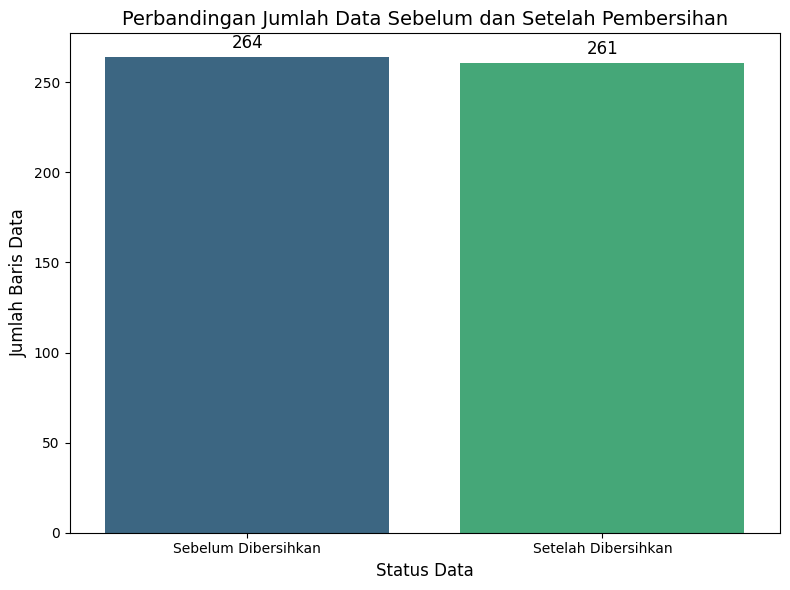

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Analisa Data
print("===================================================================")

# Data Awal
jumlah_data_awal = df.size
jumlah_baris_awal = df.shape[0]

jumlah_data = df.size
print(f'Jumlah Data Baris dan Kolom: {jumlah_data}')

# Jumlah Kolom
jumlah_kolom = df.shape[1]
print(f'Jumlah Kolom: {jumlah_kolom}')

# Jumlah Baris
jumlah_baris = df.shape[0]
print(f'Jumlah Baris: {jumlah_baris}')

# Jumlah Missing Value
jumlah_missing_value = df.isnull().sum().sum()
print(f'Jumlah Missing Value: {jumlah_missing_value}')

# Jumlah Data yang bukan numeric
jumlah_non_numeric = df.select_dtypes(exclude=[np.number]).size
print(f'Jumlah Data yang bukan numeric: {jumlah_non_numeric}')

# Jumlah Duplikasi Data
jumlah_duplikasi = df.duplicated().sum()
print(f'Jumlah Duplikasi Data: {jumlah_duplikasi}')

# Data Tidak Konsisten
juml_dkonsis = [0.46, 0.96, 1.08]
jumlah_dkonsis = len(juml_dkonsis)
print(f'Jumlah Data Tidak Konsisten: {jumlah_dkonsis}')

# Jumlah persentase data yang akan dihapus
persentase_hapus = ((jumlah_missing_value + jumlah_duplikasi + jumlah_dkonsis) / jumlah_data_awal) * 100
print(f'Persentase Data yang akan dihapus: {persentase_hapus}%')

print("===================================================================")

# Membersihkan Data
df_cleaned = df[~df['hari hujan'].isin(juml_dkonsis)]

# Data Setelah Pembersihan
jumlah_data_bersih = df_cleaned.size
jumlah_baris_bersih = df_cleaned.shape[0]

# Tipe Data
tipe_data = df_cleaned.dtypes
print(f"Tipe Data Seluruh Atribut:\n{tipe_data}")
print("===================================================================")

# Visualisasi Data Sebelum dan Sesudah Pembersihan
labels = ['Sebelum Dibersihkan', 'Setelah Dibersihkan']
data = [jumlah_baris_awal, jumlah_baris_bersih]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=data, palette='viridis')

# Menambahkan nilai di atas masing-masing bar
for i, value in enumerate(data):
    plt.text(i, value + 5, f'{value}', ha='center', fontsize=12, color='black')

# Memberikan detail pada grafik
plt.title('Perbandingan Jumlah Data Sebelum dan Setelah Pembersihan', fontsize=14)
plt.ylabel('Jumlah Baris Data', fontsize=12)
plt.xlabel('Status Data', fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
miss_val = df.isna().sum()
duplicates = df.duplicated().sum()
miss_val, duplicates

(tahun              0
 bulan              0
 curah hujan        0
 tekanan udara      0
 kecepatan angin    0
 suhu               0
 hari hujan         0
 dtype: int64,
 np.int64(0))

Outliers in Tahun:
 Empty DataFrame
Columns: [tahun, bulan, curah hujan, tekanan udara, kecepatan angin, suhu, hari hujan]
Index: []

Outliers in Bulan:
 Empty DataFrame
Columns: [tahun, bulan, curah hujan, tekanan udara, kecepatan angin, suhu, hari hujan]
Index: []


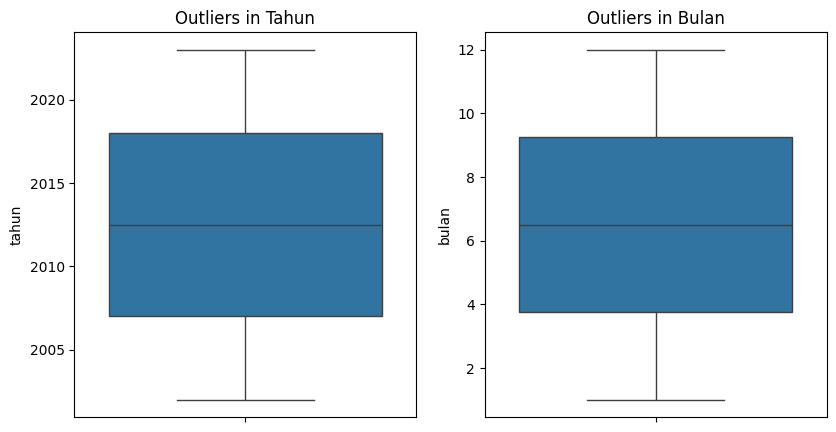

In [13]:
# prompt: buatkan visualisasi outlier pada kolom tahun, bulan, dan hari hujan.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains columns 'tahun', 'bulan', and 'hujan'

# Create box plots for each variable to visualize outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['tahun']) # No change here
plt.title('Outliers in Tahun')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['bulan']) # No change here
plt.title('Outliers in Bulan')

# ... (Rest of your code) ...


#Further analysis (optional): Identify outliers using IQR
def find_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#Example usage
outliers_tahun = find_outliers_IQR(df, 'tahun')
outliers_bulan = find_outliers_IQR(df, 'bulan')

print("Outliers in Tahun:\n", outliers_tahun)
print("\nOutliers in Bulan:\n", outliers_bulan)

In [14]:
rata2_bulan = df.groupby('bulan', as_index=False)[['curah hujan', 'suhu', 'tekanan udara', 'kecepatan angin', 'hari hujan']].mean()
rata2_bulan

,bulan,curah hujan,suhu,tekanan udara,kecepatan angin,hari hujan
0,1,174.945455,23.640909,922.477273,4.927273,22.909091
1,2,239.322727,23.409091,922.650000,4.663636,23.000000
2,3,261.009091,23.722727,922.686364,4.254545,24.500000
3,4,253.554545,23.863636,922.686364,3.681818,23.363636
4,5,200.518182,23.945455,922.840909,3.609091,19.454545
5,6,97.986364,23.490909,923.077273,3.550000,14.636364
6,7,58.086364,23.195455,923.322727,3.731818,10.363636
7,8,43.454545,23.522727,923.404545,3.686364,7.318182
8,9,78.595455,24.013636,923.663636,4.031818,10.318182
9,10,144.945455,24.209091,923.377273,4.059091,16.157273


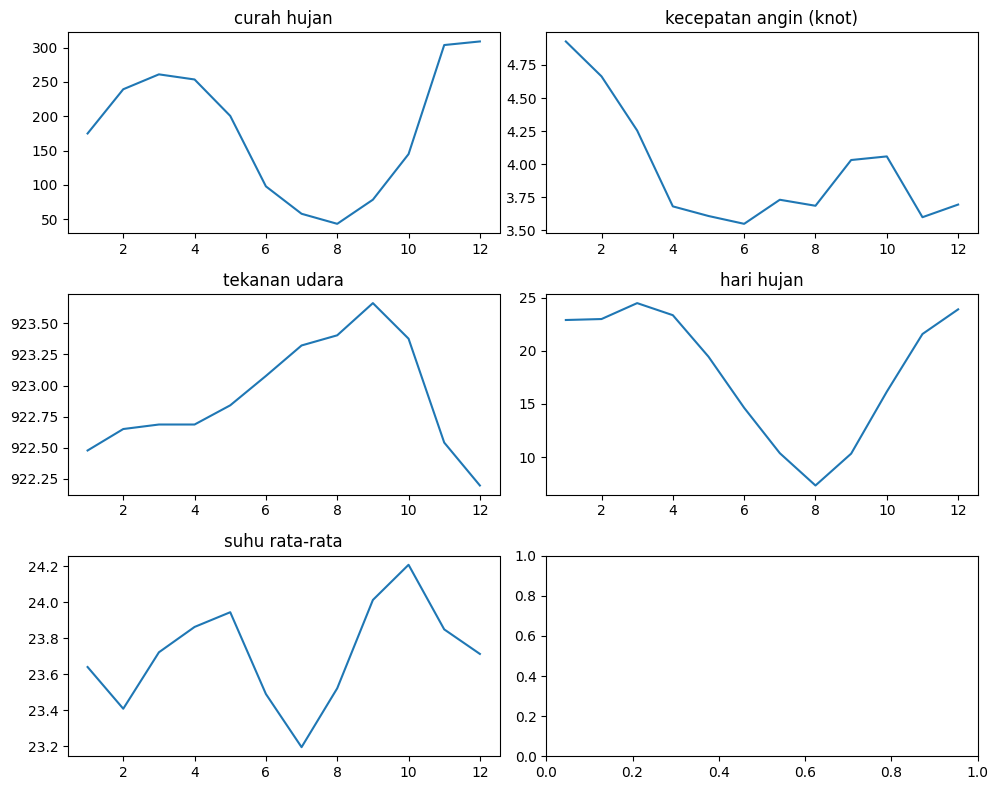

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0, 0].plot(rata2_bulan['bulan'], rata2_bulan['curah hujan'])
axs[0, 0].set_title("curah hujan")
axs[1, 0].plot(rata2_bulan['bulan'], rata2_bulan['tekanan udara'])
axs[1, 0].set_title("tekanan udara")
axs[0, 1].plot(rata2_bulan['bulan'], rata2_bulan['kecepatan angin'])
axs[0, 1].set_title("kecepatan angin (knot)")
axs[1, 1].plot(rata2_bulan['bulan'], rata2_bulan['hari hujan'])
axs[1, 1].set_title("hari hujan")
axs[2, 0].plot(rata2_bulan['bulan'], rata2_bulan['suhu'])
axs[2, 0].set_title("suhu rata-rata")
fig.tight_layout()

In [16]:
rata2_tahun = df.groupby('tahun', as_index=False)[['curah hujan', 'suhu', 'tekanan udara', 'kecepatan angin', 'hari hujan']].mean()
rata2_tahun

,tahun,curah hujan,suhu,tekanan udara,kecepatan angin,hari hujan
0,2002,188.633333,23.558333,922.316667,4.833333,14.666667
1,2003,18.833333,23.616667,922.291667,4.500000,16.083333
2,2004,161.033333,23.533333,922.275000,4.333333,20.000000
3,2005,190.241667,23.408333,922.225000,4.166667,15.416667
4,2006,144.366667,23.466667,922.325000,4.916667,17.166667
5,2007,187.958333,23.516667,922.133333,3.083333,16.750000
6,2008,166.750000,23.141667,922.541667,3.083333,16.833333
7,2009,174.800000,23.366667,922.925000,3.166667,16.833333
8,2010,322.366667,23.308333,922.383333,3.000000,23.750000
9,2011,149.058333,23.375000,922.100000,3.250000,17.916667


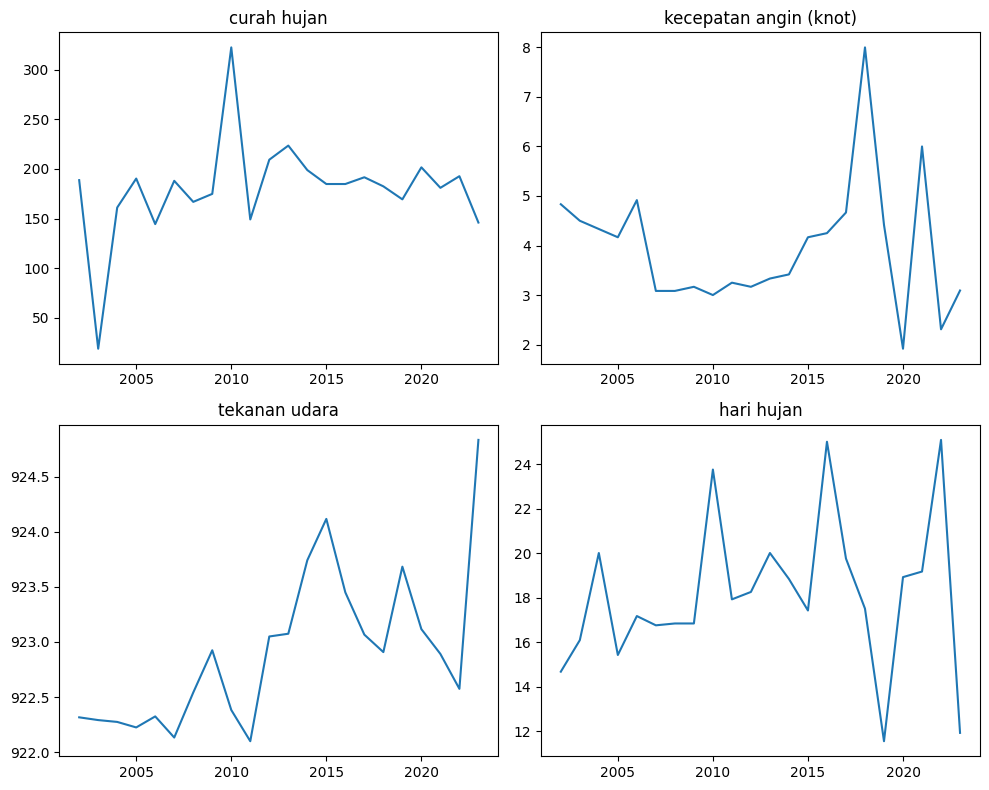

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(rata2_tahun['tahun'], rata2_tahun['curah hujan'])
axs[0, 0].set_title("curah hujan")
axs[1, 0].plot(rata2_tahun['tahun'], rata2_tahun['tekanan udara'])
axs[1, 0].set_title("tekanan udara")
axs[0, 1].plot(rata2_tahun['tahun'], rata2_tahun['kecepatan angin'])
axs[0, 1].set_title("kecepatan angin (knot)")
axs[1, 1].plot(rata2_tahun['tahun'], rata2_tahun['hari hujan'])
axs[1, 1].set_title("hari hujan")

fig.tight_layout()

In [18]:
df = df.drop(columns=['curah hujan','tekanan udara', 'kecepatan angin', 'suhu'], errors='ignore')
df

,tahun,bulan,hari hujan
0,2002,1,27.0
1,2002,2,22.0
2,2002,3,25.0
3,2002,4,20.0
4,2002,5,9.0
...,...,...,...
259,2023,8,4.0
260,2023,9,1.0
261,2023,10,4.0
262,2023,11,18.0


In [19]:
val_range = [-1, 10, 20, 33]
intensitas = ['rendah', 'sedang', 'tinggi']

df['intensitas'] = pd.cut(df['hari hujan'], bins=val_range, labels=intensitas)
df = df.drop(columns='hari hujan')
df

,tahun,bulan,intensitas
0,2002,1,tinggi
1,2002,2,tinggi
2,2002,3,tinggi
3,2002,4,sedang
4,2002,5,rendah
...,...,...,...
259,2023,8,rendah
260,2023,9,rendah
261,2023,10,rendah
262,2023,11,sedang


In [20]:
df["intensitas"] = df["intensitas"].map({"rendah":0,"sedang":1, "tinggi":2})
df

,tahun,bulan,intensitas
0,2002,1,2
1,2002,2,2
2,2002,3,2
3,2002,4,1
4,2002,5,0
...,...,...,...
259,2023,8,0
260,2023,9,0
261,2023,10,0
262,2023,11,1


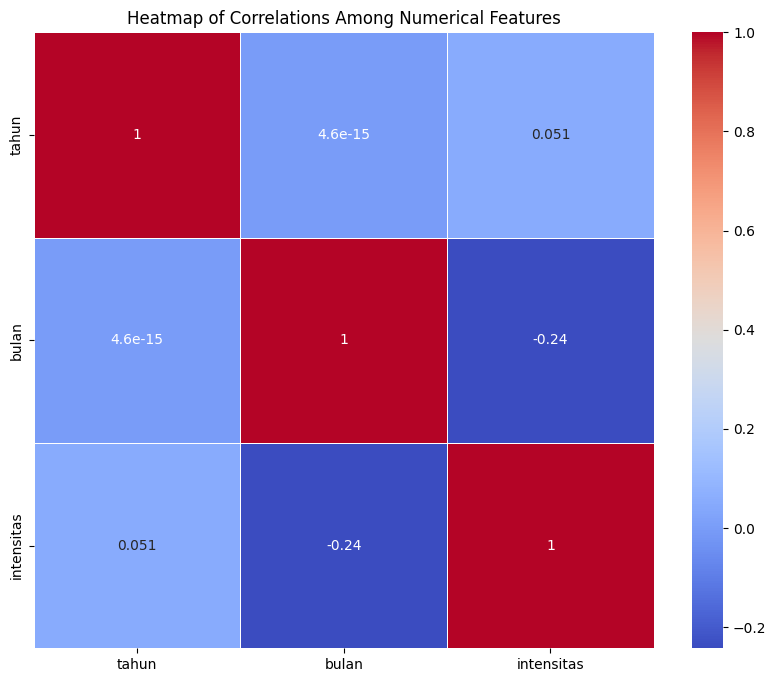

In [21]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlations Among Numerical Features')
plt.show()

In [22]:
# prompt: buatkan saya kode untuk melakukan feature extraction menggunakan metode PCA serta tampilkan hasil visualisasinya.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada DataFrame
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normalized_df

,tahun,bulan,intensitas
0,0.0,0.000000,1.0
1,0.0,0.090909,1.0
2,0.0,0.181818,1.0
3,0.0,0.272727,0.5
4,0.0,0.363636,0.0
...,...,...,...
259,1.0,0.636364,0.0
260,1.0,0.727273,0.0
261,1.0,0.818182,0.0
262,1.0,0.909091,0.5


        PC1  PC2  intensitas
0 -0.500000 -0.5         1.0
1 -0.409091 -0.5         1.0
2 -0.318182 -0.5         1.0
3 -0.227273 -0.5         0.5
4 -0.136364 -0.5         0.0


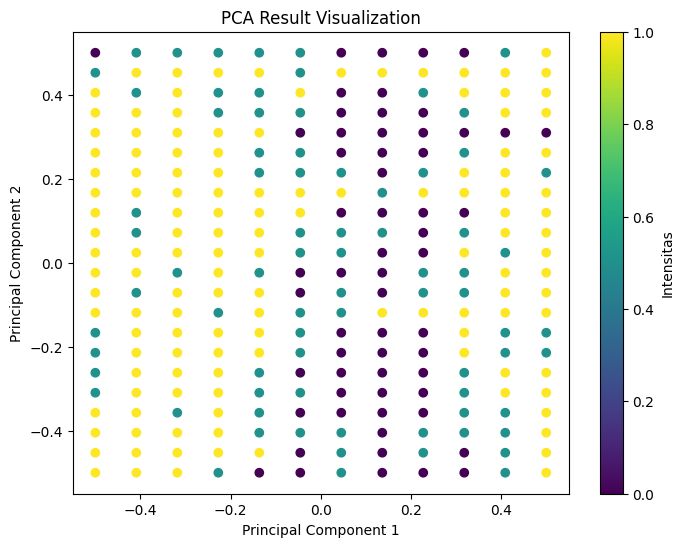

array([0.51901141, 0.48098859])

In [23]:
# prompt: buatkan saya kode untuk melakukan feature extraction menggunakan metode PCA.

# Pisahkan fitur dan target
X = normalized_df.drop('intensitas', axis=1)
y = normalized_df['intensitas']

# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=2)  # Misalnya, mengurangi menjadi 2 komponen

# Fit dan transform data
X_pca = pca.fit_transform(X)

# Buat DataFrame baru dengan komponen PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['intensitas'] = y

# Tampilkan DataFrame hasil PCA
print(df_pca.head())

# Visualisasi hasil PCA (opsional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['intensitas'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result Visualization')
plt.colorbar(label='Intensitas')
plt.show()

# Menampilkan variance ratio dari setiap komponen
pca.explained_variance_ratio_

In [24]:
x = df.drop(columns='intensitas')
y = df.intensitas

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.30, random_state=42)
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (184, 2)
X_test shape:  (80, 2)
y_train shape:  (184,)
y_test shape:  (80,)


[(184, 2), (80, 2)]


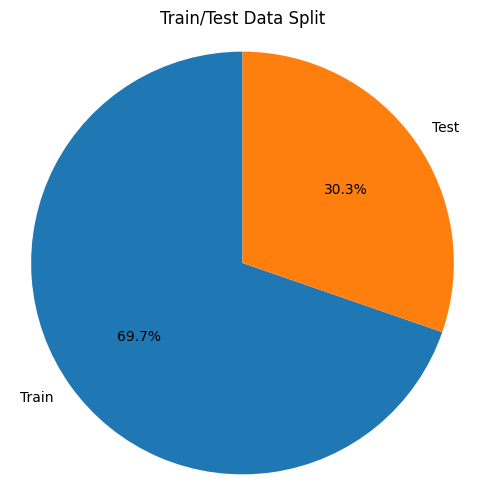

In [25]:
# prompt: buatkan visualisasi untuk pembagian data test dan train.

import matplotlib.pyplot as plt

# Assuming x_train, x_test, y_train, y_test are already defined from your code

print([np.shape(x_train), np.shape(x_test)])

# Data for the plot
train_size = len(x_train)
test_size = len(x_test)
labels = ['Train', 'Test']
sizes = [train_size, test_size]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Train/Test Data Split')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [26]:
# prompt: jadikan csv data test dan data train

# Assuming x_train, x_test, y_train, y_test are already defined from your code

# Convert training data to CSV
train_data = pd.concat([x_train, y_train], axis=1)
train_data.to_csv('train_data.csv', index=False)

# Convert testing data to CSV
test_data = pd.concat([x_test, y_test], axis=1)
test_data.to_csv('test_data.csv', index=False)

Accuracy (Desicion Tree): 0.65


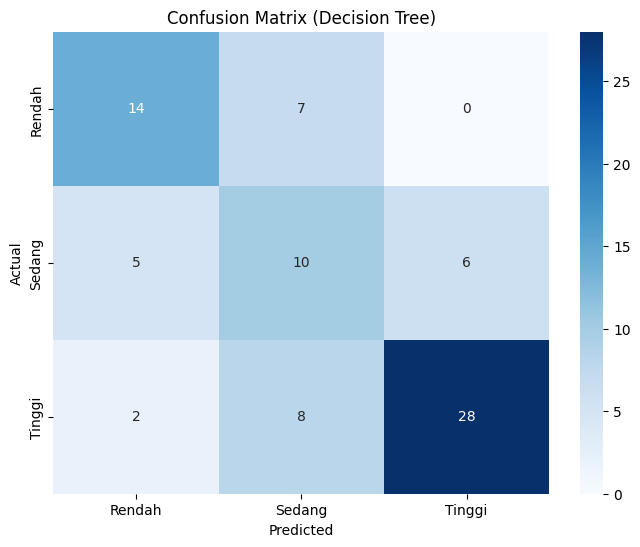

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
dt_classifier.fit(x_train, y_train)

# Melakukan prediksi pada data testing
y_pred_dt = dt_classifier.predict(x_test)

# Evaluasi model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Desicion Tree): {accuracy_dt}")
#print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Rendah', 'Sedang', 'Tinggi'],
            yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

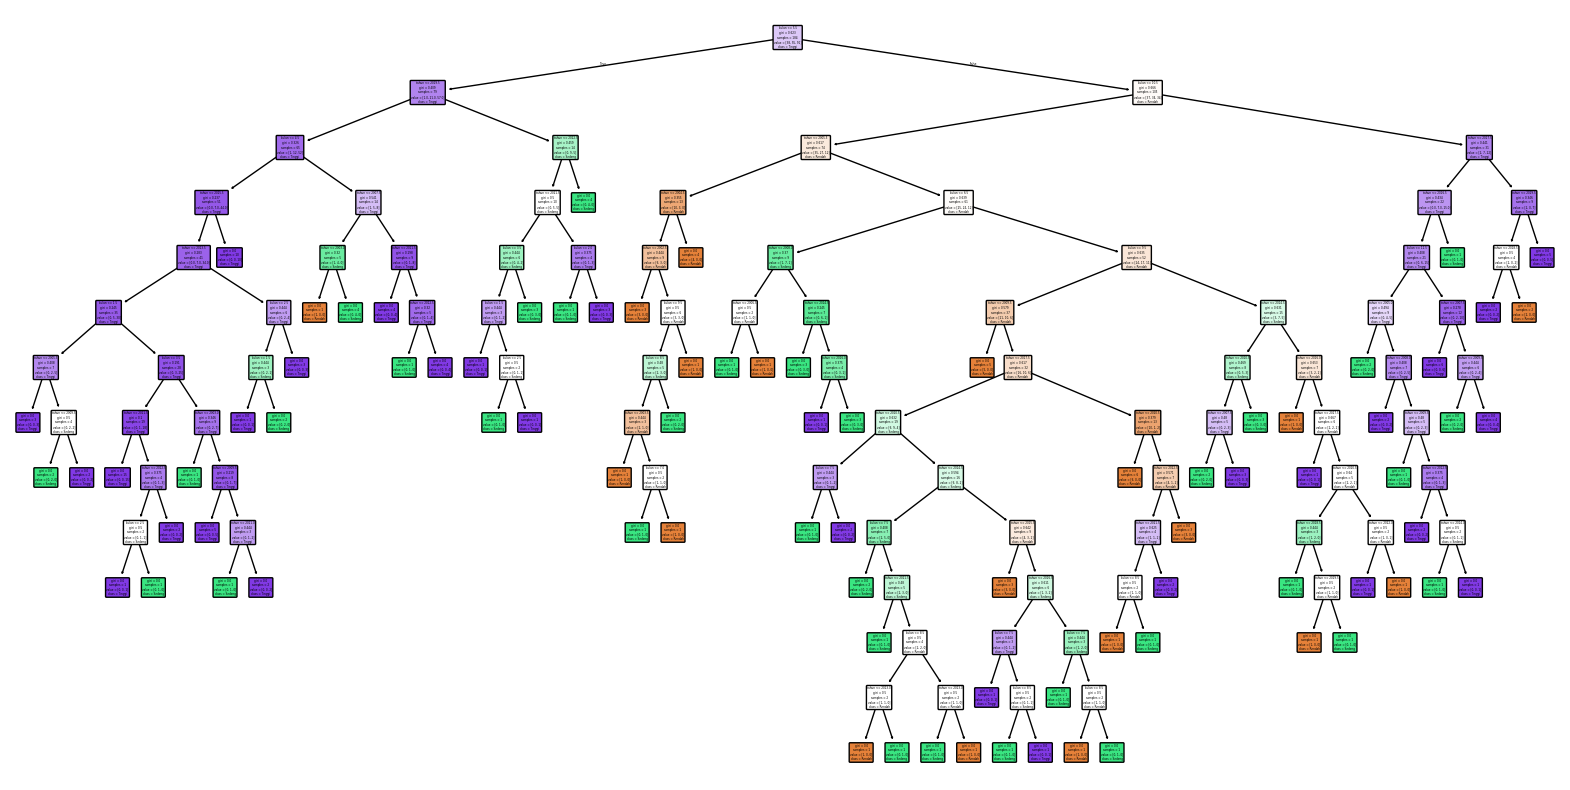

In [28]:
# prompt: buatkan visualisasi untuk desicion tree.

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_classifier,
          feature_names=x.columns,  # Menggunakan nama kolom fitur
          class_names=['Rendah', 'Sedang', 'Tinggi'], # Nama kelas target
          filled=True, rounded=True)
plt.show()

In [29]:
# Data baru untuk prediksi dengan nilai bulan dari 1 hingga 12
data_baru = pd.DataFrame({'tahun': [2025]*12, 'bulan': list(range(1, 13))})

# Melakukan prediksi dengan model yang telah dilatih
prediksi_baru = dt_classifier.predict(data_baru)

# Menampilkan hasil prediksi
for bulan, prediksi in zip(data_baru['bulan'], prediksi_baru):
    print(f"Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan {bulan}: {prediksi}")

Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 1: 1
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 2: 1
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 3: 1
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 4: 1
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 5: 1
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 6: 1
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 7: 0
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 8: 0
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 9: 0
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 10: 0
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 11: 2
Prediksi hari hujan pada algoritma decision tree untuk tahun 2025 bulan 12: 2


In [ ]:
# prompt: buatkan saya pemodelan menggunakan algoritma random forest serta tampilkan hasil evaluasi menggunakan metode confusion matrix.

from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Melatih model dengan data training
rf_classifier.fit(x_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_classifier.predict(x_test)

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")
#print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Rendah', 'Sedang', 'Tinggi'],
            yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
# prompt: buatkan visualisasi untuk random forest.

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Visualisasi satu pohon dari Random Forest
# Pilih satu pohon secara acak dari forest
estimator = rf_classifier.estimators_[5] # Mengambil estimator ke-5, bisa diganti dengan estimator lain

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=x.columns,  # Menggunakan nama kolom fitur
          class_names=['Rendah', 'Sedang', 'Tinggi'], # Nama kelas target
          filled=True, rounded=True)
plt.show()

In [ ]:
# Data baru untuk prediksi dengan nilai bulan dari 1 hingga 12
data_baru = pd.DataFrame({'tahun': [2025]*12, 'bulan': list(range(1, 13))})

# Melakukan prediksi dengan model yang telah dilatih
prediksi_baru = rf_classifier.predict(data_baru)

# Menampilkan hasil prediksi
for bulan, prediksi in zip(data_baru['bulan'], prediksi_baru):
    print(f"Prediksi hari hujan pada algoritma Random Forest untuk tahun 2025 bulan {bulan}: {prediksi}")

In [ ]:
# prompt: buatkan saya pemodelan menggunakan algoritma naive bayes serta tampilkan hasil evaluasi menggunakan metode confusion matrix.

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, x_test, y_train, y_test are already defined from your previous code

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(x_train, y_train)

# Make predictions on the test set
y_pred_gnb = gnb.predict(x_test)

# Evaluate the model using a confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Evaluasi model
accuracy_nb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy (Naive Bayes): {accuracy_nb}")
#print(classification_report(y_test, y_pred_gnb))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Rendah', 'Sedang', 'Tinggi'],
            yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()

In [ ]:


# Visualize the decision boundaries (for 2 features only)
# Choose two features for visualization (replace with your actual feature names)
feature1 = 'tahun'
feature2 = 'bulan'

if feature1 in x_train.columns and feature2 in x_train.columns:
    x_min, x_max = x_train[feature1].min() - 1, x_train[feature1].max() + 1
    y_min, y_max = x_train[feature2].min() - 1, x_train[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    sns.scatterplot(x=x_train[feature1], y=x_train[feature2], hue=y_train)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Decision Boundary (Naive Bayes)')
    plt.show()
else:
    print(f"Features '{feature1}' or '{feature2}' not found in the dataset.  Decision Boundary visualization is not possible")

In [ ]:
# Data baru untuk prediksi dengan nilai bulan dari 1 hingga 12
data_baru = pd.DataFrame({'tahun': [2025]*12, 'bulan': list(range(1, 13))})

# Melakukan prediksi dengan model yang telah dilatih
prediksi_baru = gnb.predict(data_baru)

# Menampilkan hasil prediksi
for bulan, prediksi in zip(data_baru['bulan'], prediksi_baru):
    print(f"Prediksi hari hujan pada algoritma Naive Bayes untuk tahun 2025 bulan {bulan}: {prediksi}")

In [ ]:
# prompt: buatkan saya pemodelan menggunakan algoritma svm lalu evaluasikan menggunakan metode confusion matrix.

from sklearn.svm import SVC
# Assuming x_train, x_test, y_train, y_test are already defined from your previous code

# Initialize the SVM model
svm_classifier = SVC(kernel='linear', random_state=42) # You can change the kernel

# Train the model
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate the model using a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm}")
#print(classification_report(y_test, y_pred_svm))


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Rendah', 'Sedang', 'Tinggi'],
            yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


In [ ]:
# prompt: buatkan visualisasi untuk svm.

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

# Assuming x_train, x_test, y_train, y_test are already defined and the SVM model is trained

# Visualize the decision boundaries (for 2 features only)
# Choose two features for visualization
feature1 = 'tahun'
feature2 = 'bulan'

if feature1 in x_train.columns and feature2 in x_train.columns:
    x_min, x_max = x_train[feature1].min() - 1, x_train[feature1].max() + 1
    y_min, y_max = x_train[feature2].min() - 1, x_train[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(x_train[feature1], x_train[feature2], c=y_train, edgecolors='k') # Use y_train for colors
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Decision Boundary (SVM)')
    plt.show()
else:
    print(f"Features '{feature1}' or '{feature2}' not found in the dataset. Decision Boundary visualization is not possible.")

In [ ]:


# Data baru untuk prediksi dengan nilai bulan dari 1 hingga 12
data_baru = pd.DataFrame({'tahun': [2025]*12, 'bulan': list(range(1, 13))})

# Melakukan prediksi dengan model yang telah dilatih
prediksi_baru = svm_classifier.predict(data_baru)

# Menampilkan hasil prediksi
for bulan, prediksi in zip(data_baru['bulan'], prediksi_baru):
    print(f"Prediksi hari hujan pada algoritma SVM untuk tahun 2025 bulan {bulan}: {prediksi}")

In [ ]:
# prompt: buatkan saya visualisasi untuk perbandingan keempat algoritma yang sudah saya lakukan diatas.

import matplotlib.pyplot as plt

# Assuming accuracy_dt, accuracy_rf, accuracy_nb, accuracy_svm are defined
# from your model evaluations

models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
accuracy_scores = [accuracy_dt, accuracy_rf, accuracy_nb, accuracy_svm] # Replace with your actual accuracy scores


plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()